In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as sns
from datetime import datetime
import calendar
import seaborn as sn
import csv
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from subprocess import check_output
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')

Loading the datasets

In [4]:
##Load the training data
train = pd.read_csv(r"/content/drive/MyDrive/Dataset/train.csv")
train_label = pd.read_csv(r"/content/drive/MyDrive/Dataset/train_label.csv", header = None)
test = pd.read_csv(r"/content/drive/MyDrive/Dataset/test.csv")
test_label=pd.read_csv(r"/content/drive/MyDrive/Dataset/test_label.csv",header =None)

Exploratory Data Analysis and Feature Engineering

In [5]:
train.dtypes #Checking the datatypes

datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

In [6]:
train.describe() #Analyzing the data statistically 

,holiday,workingday,temp,atemp,humidity,windspeed
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900


In [7]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012
...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979


In [8]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994
...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981


In [9]:
train_label

,0
0,504
1,5
2,139
3,209
4,184
...,...
8703,13
8704,11
8705,1
8706,92


In [10]:
test_label

,0
0,256
1,87
2,11
3,84
4,668
...,...
2173,3
2174,144
2175,159
2176,29


In [11]:
# Creating new columns from the DateTime columns
train['Date']= train.datetime.apply(lambda x : x.split()[0])
train['hour'] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["weekday"] = train.Date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
train["month"] = train.Date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])


test['date'] = test.datetime.apply(lambda x : x.split()[0])
test['hour'] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["weekday"] = test.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
test["month"] = test.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

In [12]:
train['Total_booking']=train_label[0]
test['Total_booking']=test_label[0]

In [13]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Date,hour,weekday,month,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5/2/2012,19,Wednesday,May,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,9/5/2012,4,Wednesday,September,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,1/13/2011,9,Thursday,January,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,11/18/2011,16,Friday,November,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,9/13/2011,13,Tuesday,September,184


Data Visualization

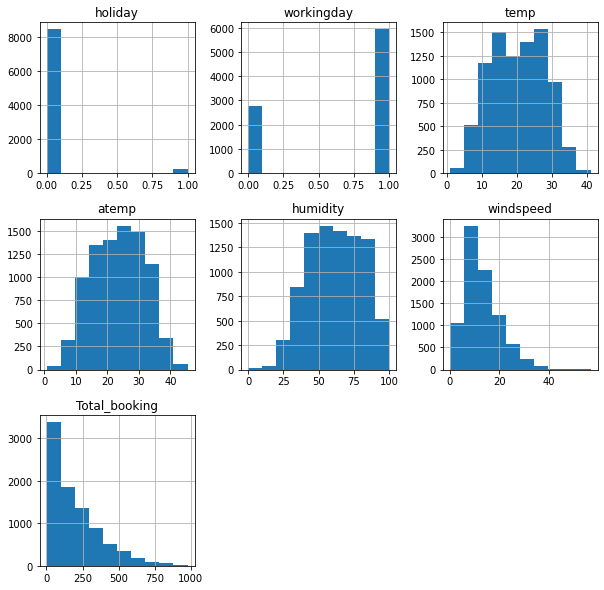

In [14]:
train.hist(figsize=(10,10))
plt.show()

In [15]:
train['season'].unique()

array(['Summer', 'Fall', 'Spring', 'Winter'], dtype=object)

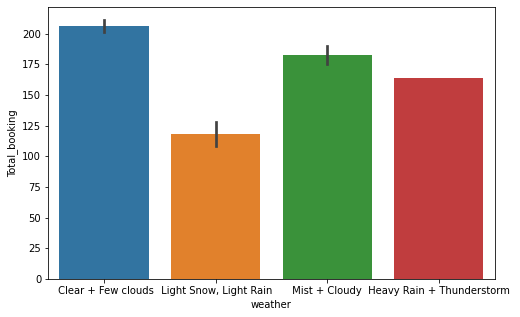

In [16]:
ax, fig = plt.subplots(figsize=[8,5])
sns.barplot(x="weather", y="Total_booking",data=train)

### From the above plot,it can be observed that, during Light Snow,Light rain, there is a drop in cab booking compared to that of the other weather conditions. 

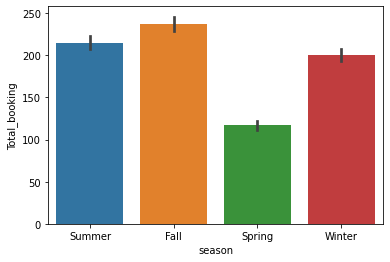

In [17]:
#ax, fig = plt.subplots(figsize=[8,5])
sns.barplot(x="season", y="Total_booking",data=train)

### From the above plot,it can be observed that, during Spring season, the demand for cab booking is almost 50% less than that of the bookings during the Fall.

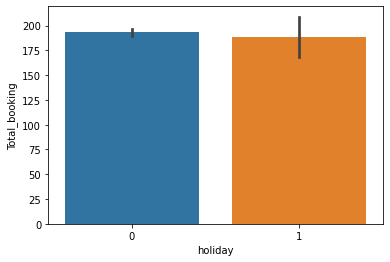

In [18]:
#ax, fig = plt.subplots(figsize=[8,4])
sns.barplot(x="holiday", y="Total_booking",data=train)

### From the above plot, it can be seen that the demand for cab is almost equal in both the days(holidays and working days)

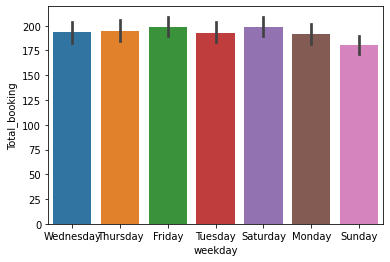

In [19]:
#ax, fig = plt.subplots(figsize=[15,9])
sns.barplot(x="weekday", y="Total_booking",data=train)

### From the above plot, it can be interpreteed that the demand for cab is almost same in each day of the week. On Sunday, the booking was slightly less compared to other days.

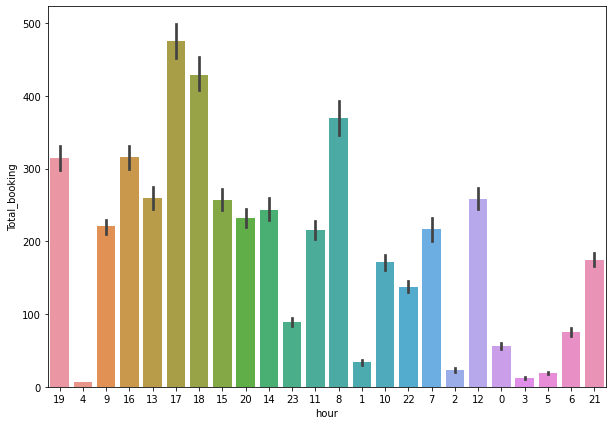

In [20]:
ax, fig = plt.subplots(figsize=[10,7])
sns.barplot(x="hour", y="Total_booking",data=train)

### From the above graph, it has been observed that, maximum number if cab has been booked between 5pm to 6pm, followed by 8pm, 4pm and 7pm. 

In [21]:
train.isnull().sum() #Checking for null values

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Date             0
hour             0
weekday          0
month            0
Total_booking    0
dtype: int64

In [22]:
le=LabelEncoder() #Handling Categorical variables of training dataset using Lebel Encoder 
train['season']=le.fit_transform(train['season'])
train['weekday']=le.fit_transform(train['weekday'])
train['month']=le.fit_transform(train['month'])
train['weather']=le.fit_transform(train['weather'])
train['date']=le.fit_transform(train['Date'])
train['hour']=le.fit_transform(train['hour'])

In [23]:
le=LabelEncoder() #Handling Categorical variables of testing dataset using Lebel Encoder 
test['season']=le.fit_transform(test['season'])
test['weekday']=le.fit_transform(test['weekday'])
test['month']=le.fit_transform(test['month'])
test['weather']=le.fit_transform(test['weather'])
test['date']=le.fit_transform(test['date'])
test['hour']=le.fit_transform(test['hour'])

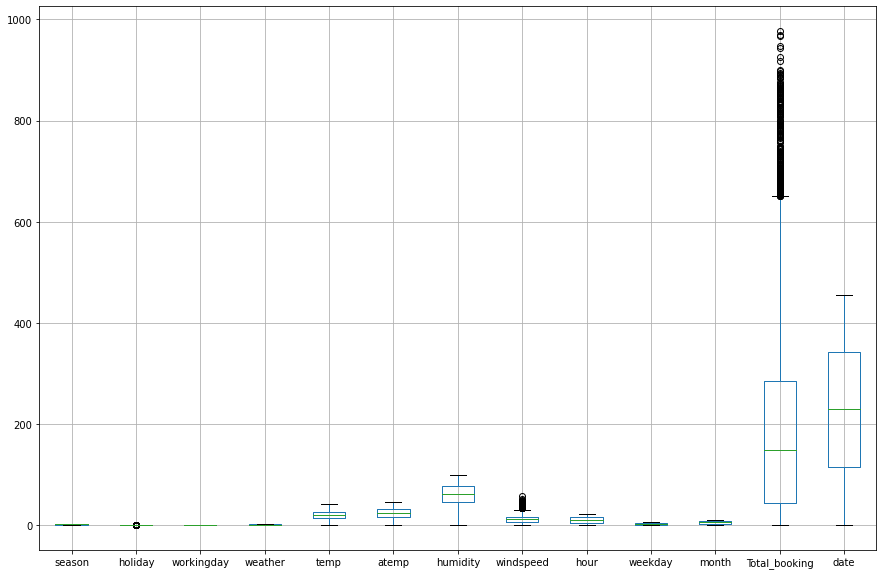

In [24]:
train.boxplot(figsize=(15,10)) #Checking for outlierls in the data using Box Plot
plt.show()

In [25]:
train.shape

(8708, 15)

In [26]:
#Removing the outliers using Inter Quartile Range
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

season             3.0000
holiday            0.0000
workingday         1.0000
weather            3.0000
temp              12.3000
atemp             14.3950
humidity          31.0000
windspeed          9.9964
hour              12.0000
weekday            4.0000
month              7.0000
Total_booking    243.0000
date             227.0000
dtype: float64


In [27]:
train=train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
test=test[~((test < (Q1 - 1.5 * IQR)) |(test > (Q3 + 1.5 * IQR))).any(axis=1)]


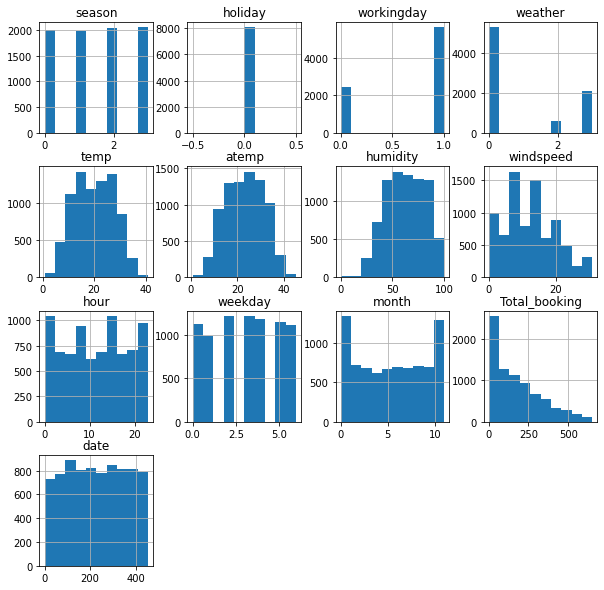

In [28]:
# Plotting the histogram for the data
train.hist(figsize=(10,10))
plt.show()

In [29]:
#Removing the Unnecessary columns
train.drop(['holiday','datetime'], axis=1, inplace=True)
test.drop(['holiday','datetime'], axis=1, inplace=True)


# Corelation Matrix

In [30]:
correlation = train.corr()
correlation

,season,workingday,weather,temp,atemp,humidity,windspeed,hour,weekday,month,Total_booking,date
season,1.000000,0.002563,0.066211,-0.383931,-0.352690,0.058274,-0.003443,-0.007641,0.002078,0.131895,0.007478,-0.652927
workingday,0.002563,1.000000,0.017063,0.024660,0.017016,-0.015951,0.021249,-0.008058,0.177359,-0.006403,-0.024626,-0.000018
weather,0.066211,0.017063,1.000000,-0.059193,-0.055762,0.336493,-0.025843,-0.005860,0.041966,0.016293,-0.084688,-0.053378
temp,-0.383931,0.024660,-0.059193,1.000000,0.984975,-0.066413,-0.005339,-0.141751,0.010489,0.118161,0.379527,0.716378
atemp,-0.352690,0.017016,-0.055762,0.984975,1.000000,-0.046867,-0.045155,-0.137376,0.016052,0.127719,0.376344,0.696671
humidity,0.058274,-0.015951,0.336493,-0.066413,-0.046867,1.000000,-0.299707,0.267559,0.050557,0.130168,-0.320898,0.050236
windspeed,-0.003443,0.021249,-0.025843,-0.005339,-0.045155,-0.299707,1.000000,-0.112902,0.028365,-0.031276,0.119772,-0.047596
hour,-0.007641,-0.008058,-0.005860,-0.141751,-0.137376,0.267559,-0.112902,1.000000,-0.000242,-0.008903,-0.107521,0.010133
weekday,0.002078,0.177359,0.041966,0.010489,0.016052,0.050557,0.028365,-0.000242,1.000000,0.006874,-0.036306,-0.021042
month,0.131895,-0.006403,0.016293,0.118161,0.127719,0.130168,-0.031276,-0.008903,0.006874,1.000000,0.086626,-0.020832


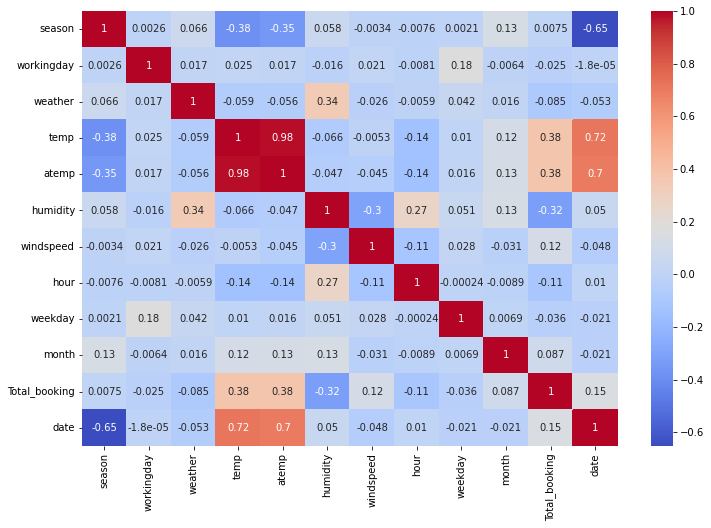

In [31]:
plt.subplots(figsize=(12,8))
sns.heatmap(correlation,annot=True, cmap='coolwarm')

In [32]:
train.columns

Index(['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'Date', 'hour', 'weekday', 'month', 'Total_booking',
       'date'],
      dtype='object')

# Data Preparation for Training

In [33]:
X = train.loc[:, ['season', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'hour', 'weekday', 'month']]
X.head()

,season,workingday,weather,temp,atemp,humidity,windspeed,hour,weekday,month
0,2,1,0,22.14,25.760,77,16.9979,11,6,8
1,0,1,0,28.70,33.335,79,19.0012,18,6,11
2,1,1,0,5.74,6.060,50,22.0028,23,4,4
3,3,1,0,13.94,16.665,29,8.9981,8,0,9
4,0,1,0,30.34,33.335,51,19.0012,5,5,11


In [34]:
y = train['Total_booking']
y.head()

0    504
1      5
2    139
3    209
4    184
Name: Total_booking, dtype: int64

In [35]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [36]:
print(selection.feature_importances_)

[0.03577315 0.0805484  0.02463366 0.08624943 0.09760989 0.10124254
 0.03192635 0.48336457 0.02758826 0.03106374]


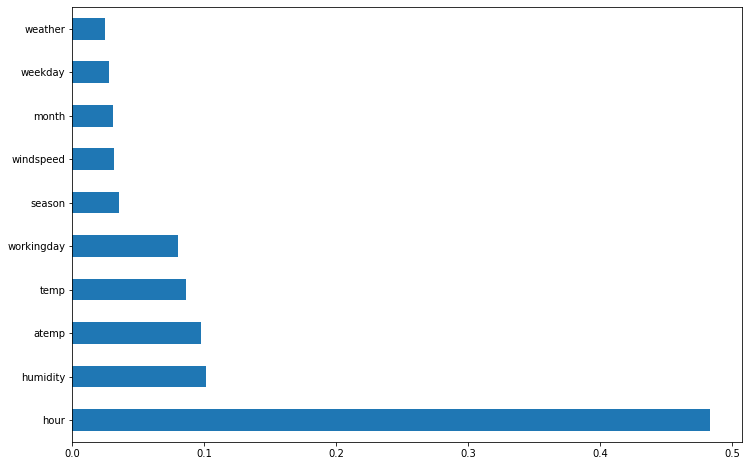

In [37]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [38]:
X = train[['season', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'hour', 'weekday']]
Y = train['Total_booking']

In [39]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2, random_state=42) # Splitting the dataset using train-test-split

In [40]:
#Standardising the data
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(x_train)  
xtest = sc_x.transform(x_test) 

In [41]:
#Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


models=[]
models.append(('lr',LinearRegression()))
models.append(('decision tree',DecisionTreeRegressor()))
models.append(('svr',SVR(kernel = 'rbf')))
models.append(('rfr',RandomForestRegressor()))



for name,model in models:
  kfold=KFold(n_splits=10) 
  cross_val_sc=cross_val_score(model,x_train,y_train,scoring='r2',cv=kfold)
  print('{} : acc: {}(standard deviation: {})'.format(name,cross_val_sc.mean(),cross_val_sc.std()))


lr : acc: 0.262514100714426(standard deviation: 0.027023927771854844)
decision tree : acc: 0.7022470670414602(standard deviation: 0.01926067523584962)
svr : acc: 0.1885042541470206(standard deviation: 0.02504161964391239)
rfr : acc: 0.8380200812984576(standard deviation: 0.007750781391996005)


From above, it has been observed that Random Forest Regressor is giving highest accuracy.

## Hyperparameter tuning using GridsearchCV

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],;;
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(x_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}


In [43]:
print(g_search.best_score_)


0.7821641095723882


In [48]:
rfr_new=RandomForestRegressor(bootstrap=True, max_depth= 80, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 1000)

In [49]:
rfr_new.fit(x_train, y_train)

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000)

In [52]:
y_pred=rfr_new.predict(x_test)


In [59]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8164102197222542

In [53]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 50.046741580333645
Mean Squared Error: 4734.752333594756
Root Mean Squared Error: 68.80953664714475
